Optimize the portfolio.
=====



In [1]:
from mypo import Runner, Loader
from mypo.rebalancer import MonthlyRebalancer
from mypo.optimizer import MinimumVarianceOptimizer, SharpRatioOptimizer
from mypo.indicator import yearly_total_return, max_drawdown, max_drawdown_span
import numpy as np

In [2]:
loader = Loader()

In [3]:
loader.get('VOO', 0.0003)
loader.get('EDV', 0.0007)

In [4]:
market = loader.get_market()

100%|██████████| 2468/2468 [00:06<00:00, 405.42it/s]


[0.43777437 0.56222563]
1.1260106477805503
0.8662014539775794
232


<AxesSubplot:>

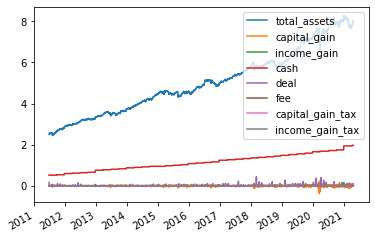

In [5]:
optimizer = MinimumVarianceOptimizer()
runner = Runner(
    assets=[1.2, 0.8],
    rebalancer=MonthlyRebalancer(optimizer=optimizer, do_re_optimize=True),
    cash=0.5
)

runner.run(
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(optimizer.get_weights())
print(yearly_total_return(report))
print(max_drawdown(report))
print(max_drawdown_span(report))
report.plot()

100%|██████████| 2468/2468 [00:06<00:00, 409.20it/s]


[0.40408736 0.59591264]
1.1207473054057562
0.8683841698231057
237


<AxesSubplot:>

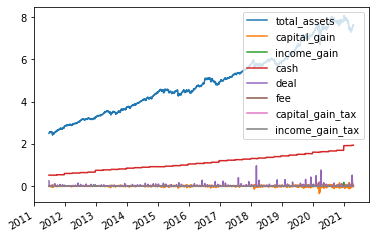

In [6]:
optimizer = MinimumVarianceOptimizer(with_semi_covariance=True)

runner = Runner(
    assets=[1.2, 0.8],
    rebalancer=MonthlyRebalancer(optimizer=optimizer, do_re_optimize=True),
    cash=0.5
)

runner.run(
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(optimizer.get_weights())
print(yearly_total_return(report))
print(max_drawdown(report))
print(max_drawdown_span(report))
report.plot()

100%|██████████| 2468/2468 [00:05<00:00, 415.34it/s]


[0.59812599 0.40187401]
1.106279142063255
0.854240585846224
325


<AxesSubplot:>

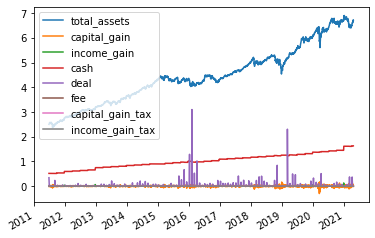

In [7]:
optimizer = SharpRatioOptimizer()

runner = Runner(
    assets=[1.2, 0.8],
    rebalancer=MonthlyRebalancer(optimizer=optimizer, do_re_optimize=True),
    cash=0.5
)

runner.run(
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(optimizer.get_weights())
print(yearly_total_return(report))
print(max_drawdown(report))
print(max_drawdown_span(report))
report.plot()